In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 688.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=3d8f18211b3e9eb4a5fcb8a165a112eed7f34f826ae6cb770894761ab5c51dd6
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [3]:
from sklearn.cluster import \
(KMeans,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram,
cut_tree)
from ISLP.cluster import compute_linkage

# 12.6 Applied Exercises

## Question 7. In this chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the $i_{th}$ and $j_{th}$ observations, then the quantity $1 − r_{ij}$ is proportional to the squared Euclidean distance between the $i_{th}$ and $j_{th}$ observations.

## On the USArrests data, show that this proportionality holds.

In [4]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [5]:
usS = StandardScaler().fit_transform(USArrests)
usS

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [6]:
usS = pd.DataFrame(usS, columns= USArrests.columns)

In [7]:
usS

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [8]:
usS.mean()

,0
Murder,-7.105427e-17
Assault,1.387779e-16
UrbanPop,-4.396483e-16
Rape,8.593126e-16


In [9]:
usS.std()

,0
Murder,1.010153
Assault,1.010153
UrbanPop,1.010153
Rape,1.010153


In [21]:
corr_dist = np.corrcoef(usS, rowvar = False)
corr_dist

array([[1.        , 0.80187331, 0.06957262, 0.56357883],
       [0.80187331, 1.        , 0.2588717 , 0.66524123],
       [0.06957262, 0.2588717 , 1.        , 0.41134124],
       [0.56357883, 0.66524123, 0.41134124, 1.        ]])

In [18]:
from sklearn.metrics import pairwise_distances
pairwise = pairwise_distances(usS.T)
pairwise

array([[0.00000000e+00, 4.45114242e+00, 9.64586636e+00, 6.60621803e+00],
       [4.45114242e+00, 0.00000000e+00, 8.60888087e+00, 5.78583417e+00],
       [9.64586636e+00, 8.60888087e+00, 0.00000000e+00, 7.67241008e+00],
       [6.60621803e+00, 5.78583417e+00, 7.67241008e+00, 1.68587394e-07]])

In [22]:
new_dist = 1 - corr_dist
new_dist

array([[2.22044605e-16, 1.98126688e-01, 9.30427378e-01, 4.36421167e-01],
       [1.98126688e-01, 0.00000000e+00, 7.41128298e-01, 3.34758770e-01],
       [9.30427378e-01, 7.41128298e-01, 2.22044605e-16, 5.88658764e-01],
       [4.36421167e-01, 3.34758770e-01, 5.88658764e-01, 0.00000000e+00]])

In [23]:
portion_dist = pairwise / new_dist
portion_dist

<ipython-input-23-8a680349f942>:1: RuntimeWarning: divide by zero encountered in divide
  portion_dist = pairwise / new_dist
<ipython-input-23-8a680349f942>:1: RuntimeWarning: invalid value encountered in divide
  portion_dist = pairwise / new_dist


array([[ 0.        , 22.46614253, 10.36713513, 15.13725395],
       [22.46614253,         nan, 11.6159117 , 17.28359249],
       [10.36713513, 11.6159117 ,  0.        , 13.03371417],
       [15.13725395, 17.28359249, 13.03371417,         inf]])

In [25]:
from scipy.spatial.distance import pdist, squareform
euclidean_distances_squared = pdist(usS.T, metric='sqeuclidean')
euclidean_distances_squared = squareform(euclidean_distances_squared)
euclidean_distances_squared

array([[ 0.        , 19.81266883, 93.04273783, 43.6421167 ],
       [19.81266883,  0.        , 74.1128298 , 33.47587703],
       [93.04273783, 74.1128298 ,  0.        , 58.86587644],
       [43.6421167 , 33.47587703, 58.86587644,  0.        ]])

In [26]:
portion_dist_euc = pairwise / euclidean_distances_squared
portion_dist_euc

<ipython-input-26-64236da407b4>:1: RuntimeWarning: divide by zero encountered in divide
  portion_dist_euc = pairwise / euclidean_distances_squared
<ipython-input-26-64236da407b4>:1: RuntimeWarning: invalid value encountered in divide
  portion_dist_euc = pairwise / euclidean_distances_squared


array([[       nan, 0.22466143, 0.10367135, 0.15137254],
       [0.22466143,        nan, 0.11615912, 0.17283592],
       [0.10367135, 0.11615912,        nan, 0.13033714],
       [0.15137254, 0.17283592, 0.13033714,        inf]])

In [27]:
# Same ratio either way. IT seems if you know one portion then you could discover the other pairwise like
#{12,3} to {2,1}

## Question - 8. In Section 12.2.3, a formula for calculating PVE was given in Equation 12.10. We also saw that the PVE can be obtained using the explained_variance_ratio_ attribute of a fitted PCA() estimator.

## On the USArrests data, calculate PVE in two ways:

### (a) Using the explained_variance_ratio_ output of the fitted PCA() estimator, as was done in Section 12.2.3.


In [28]:
pca = PCA()
pca.fit(usS)

PCA()

In [29]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

### (b) By applying Equation 12.10 directly. The loadings are stored as the components_ attribute of the fitted PCA() estimator. Use those loadings in Equation 12.10 to obtain the PVE.

In [30]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [31]:
usS.columns, usS.index

(Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object'),
 RangeIndex(start=0, stop=50, step=1))

In [42]:
ret = []
for m in range(4):
  ans = tot = 0
  for i in range(50):
    for j in range(4):
      ans += (pca.components_[j][m] * usS.iloc[i][j])
    tot += (ans**2)
    ans = 0
  ans2 = tot2 = 0
  for j in range(4):
    for i in range(50):
      ans2 += (usS.iloc[i][j]**2)
    tot2 += ans2
    ans2 = 0
  ret.append(tot/tot2)
ret




<ipython-input-42-97d3b1a4eea0>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ans += (pca.components_[j][m] * usS.iloc[i][j])
<ipython-input-42-97d3b1a4eea0>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ans2 += (usS.iloc[i][j]**2)


[0.4578010287698383,
 0.15433781419585477,
 0.15291688938502657,
 0.23494426764928114]

In [52]:

components = pca.components_

cov_matrix = np.cov(usS.T)

eigenvalues, _ = np.linalg.eigh(cov_matrix)

eigenvalues = np.flip(eigenvalues)


total_variance = np.sum(eigenvalues)
pve_from_eigenvalues = eigenvalues / total_variance

print("Manual PVE Calculation using eigenvalues:")
print(pve_from_eigenvalues)

print("\nPVE using PCA's explained_variance_ratio_:")
print(pca.explained_variance_ratio_)



Manual PVE Calculation using eigenvalues:
[0.62006039 0.24744129 0.0891408  0.04335752]

PVE using PCA's explained_variance_ratio_:
[0.62006039 0.24744129 0.0891408  0.04335752]


In [53]:
# Guess the formula in the book is a tad off but using eigen values seems to work well

## Question - 9. Consider the USArrests data. We will now perform hierarchical clustering on the states.

### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [55]:
HClust = AgglomerativeClustering
h_comp = HClust(distance_threshold = 0, n_clusters = None, linkage = 'complete', metric = 'euclidean')
h_comp.fit(usS)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='euclidean', n_clusters=None)

### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

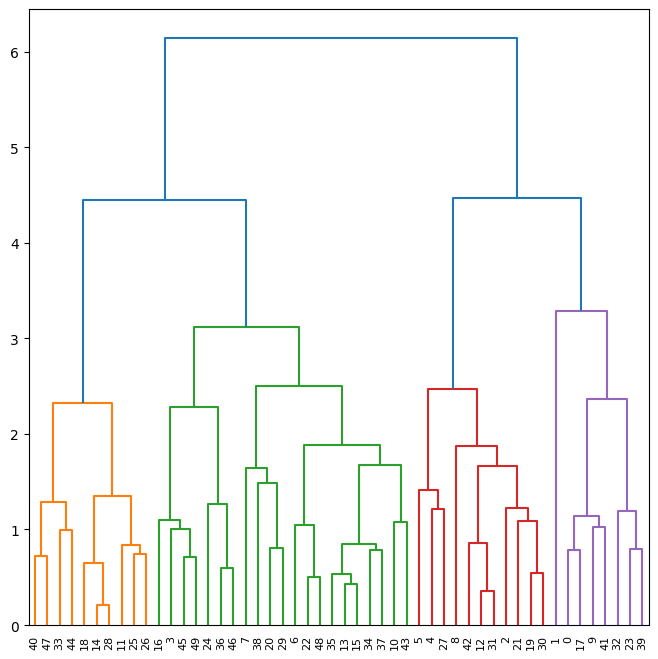

In [57]:
linkage = compute_linkage(h_comp)
fig, ax = plt.subplots(figsize = (8,8))
dendrogram(linkage, ax = ax);


In [60]:
cut_tree(linkage, n_clusters = 3).T

array([[0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
        2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2,
        2, 2, 2, 2, 2, 2]])

### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [61]:
# I did this above, so I will do the nonscaled version here.

In [62]:
HClust_ = AgglomerativeClustering
h_comp_ = HClust_(distance_threshold = 0, n_clusters = None, linkage = 'complete', metric = 'euclidean')
h_comp_.fit(USArrests)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='euclidean', n_clusters=None)

In [65]:
linkage_ = compute_linkage(h_comp_)
cut_tree(linkage_, n_clusters = 3 ).T

array([[0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
        2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
        2, 1, 1, 2, 2, 1]])

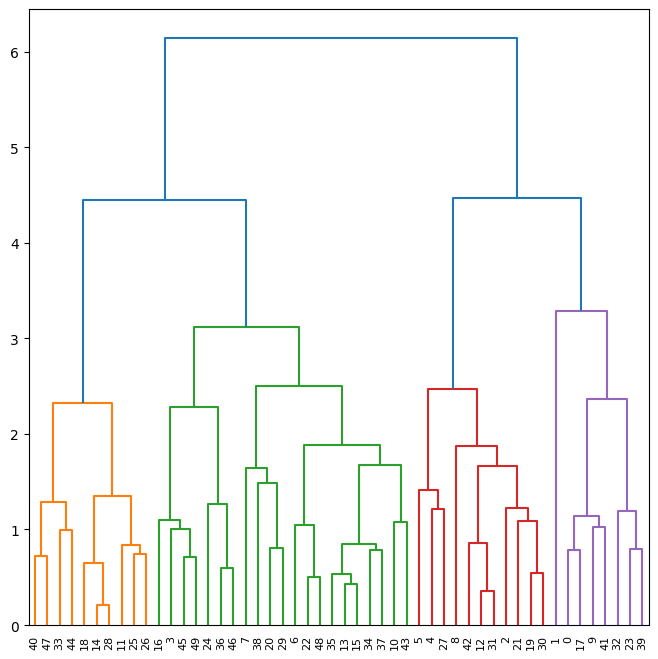

In [67]:
fig, ax = plt.subplots(figsize = (8,8))
dendrogram(linkage, ax = ax);

### (d) What efect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justifcation for your answer.


### Results (d) - The results majorly don't look any different from the dendrogram since the large groups merge point aren't as effected. However when examining the cut at n_clusters = 3. There is a significant difference.

### I believe the variables should be scaled if their units are different or the context is different. The difference is also diffcult to compute to a scale. So I believe it is best to scale everything to mean = 0 and STD = 1.

### Just like the computer and socks example, given in the book.

## Question - 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.